# IBM HR Employee Attrition

### Decision Tree Classification

| Model Name | Accuaracy | Kappa Score | ROC AUC Curve value |
| ------------ | ---------------- | ---------------- | ---------------- | 
| Decision tree with normal data | 84.23% | 0.25 | 0.61 |
| Random forest with normal data | 87.22% | 0.26 | 0.59 |
| Decision tree with smote data	 | 76.08% | 0.15 | 0.59 |
| Random forest with smote data	 | 85.05% | 0.31 | 0.63 |

> Random Forest made using normal data is more accurate, however random forest made with smote data is more reliabe

Random Forest with SMOTE data performed the best overall with an 85.05% accuracy, 0.31 Kappa score, and 0.63 ROC AUC value, indicating improved performance in handling imbalanced data.

In [1]:
#Loading all Packages
print("==================== BLOCK 1 Started! ======================")
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.options.display.max_rows=10
pd.options.display.max_columns=50
import numpy as np
import time
import sklearn
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import os     
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'
%matplotlib inline
r_state=52
import warnings
warnings.filterwarnings('ignore')
print("==================== Packages Loaded ======================")

==================== BLOCK 1 Started! ======================
==================== Packages Loaded ======================


In [2]:
print("==================== Data Loading ======================")
start_time = time.time()
df=pd.read_csv('MainEncodedData.csv')
del df['Unnamed: 0']
df.info()
print("==================== Data Loaded In ======================")
print("==================== Data Shape "+str(df.shape)+" ======================")
print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

==================== Data Loading ======================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 51 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   BusinessTravel                     1470 non-null   int64
 3   DailyRate                          1470 non-null   int64
 4   DistanceFromHome                   1470 non-null   int64
 5   Education                          1470 non-null   int64
 6   EmployeeCount                      1470 non-null   int64
 7   EmployeeNumber                     1470 non-null   int64
 8   EnvironmentSatisfaction            1470 non-null   int64
 9   HourlyRate                         1470 non-null   int64
 10  JobInvolvement                     1470 non-null   int64
 11  JobLevel                 

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,...,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,...,0,5,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,2,279,8,1,1,2,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,...,1,7,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,2,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,...,3,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,1,591,2,1,1,7,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,...,2,2,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [4]:
train, test = sklearn.model_selection.train_test_split(df, train_size = 0.75,random_state=r_state)
print("For Main Data Set :",df['Attrition'].count())
print("For Train Set :",train['Attrition'].count())
print("For Test Set :",test['Attrition'].count())

x_train=train.drop(train.columns[1], axis = 1)
x_test=test.drop(test.columns[1], axis = 1)
y_train=train['Attrition']
y_test=test['Attrition']

For Main Data Set : 1470
For Train Set : 1102
For Test Set : 368


#### Ok so now let us begin with creation of decision trees , lets visualize the tree and find the best parameter for our tree

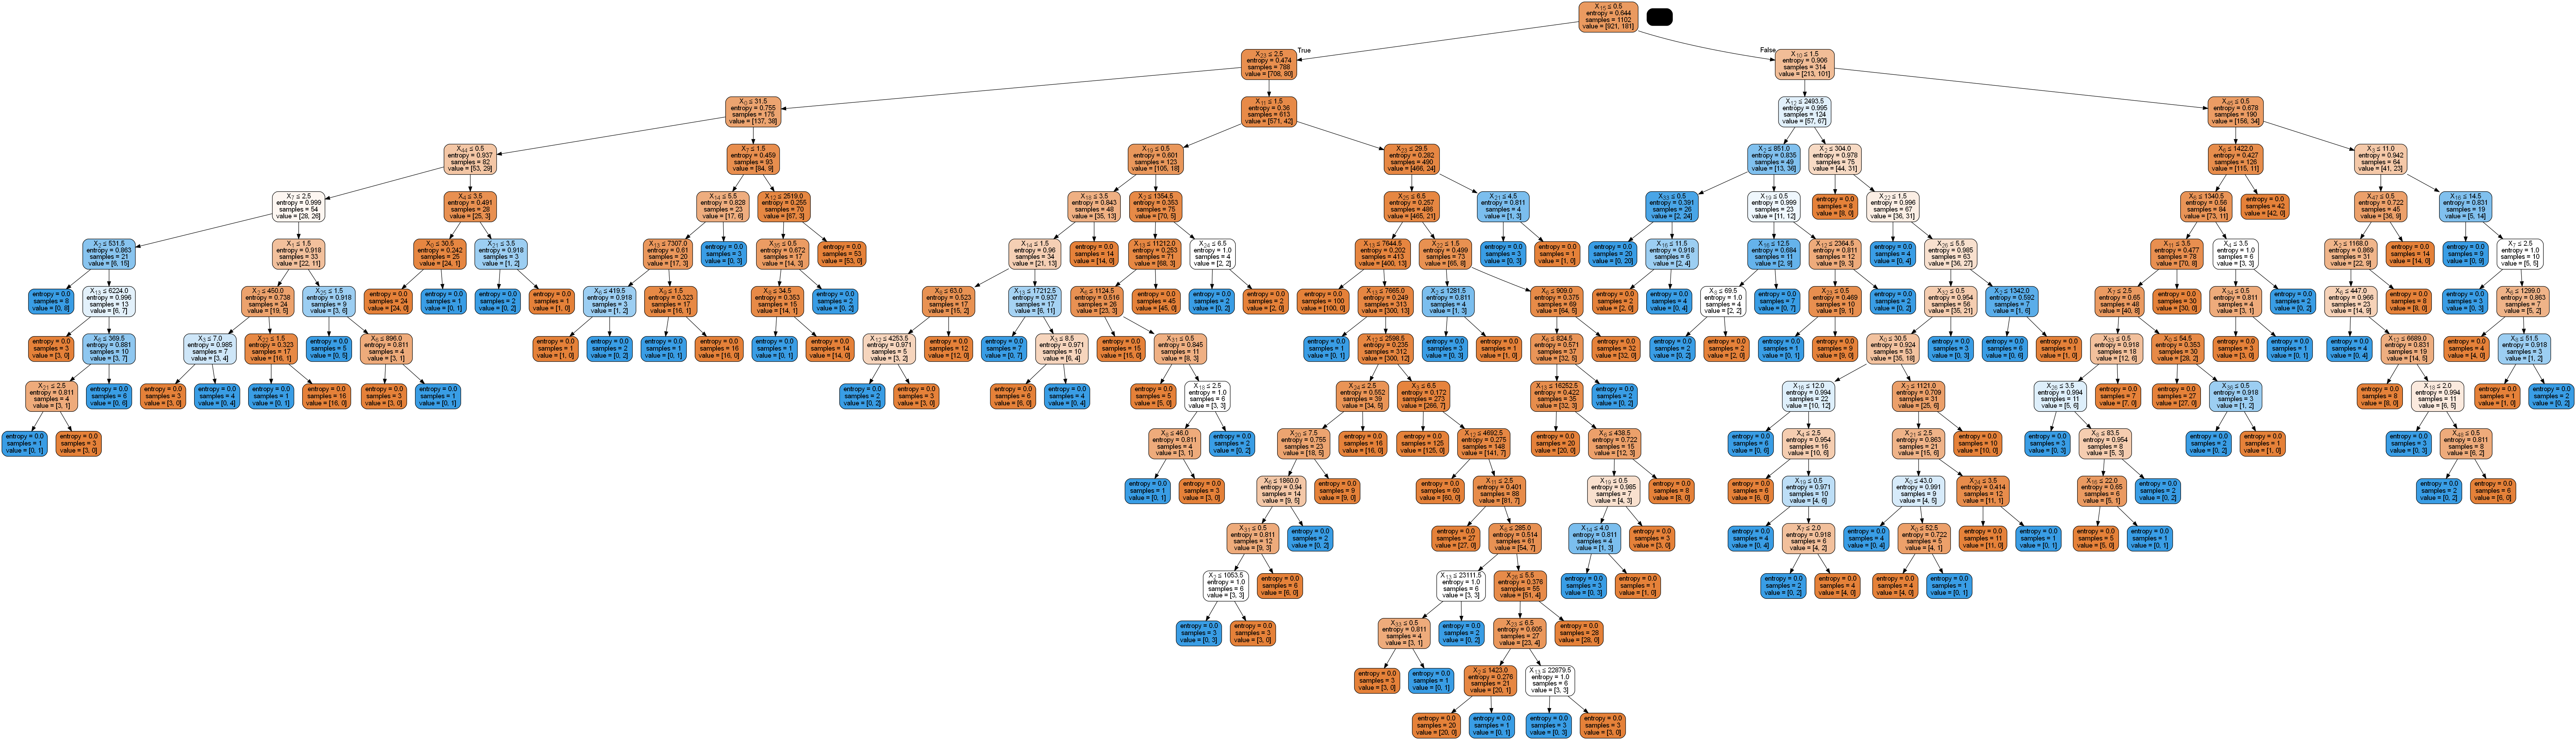

In [5]:
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state = r_state)
estimator.fit(x_train, y_train)
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

The top accuracy forecast with cross validation is 84.2%
Obtained with min_impurity_decrease = 0.0


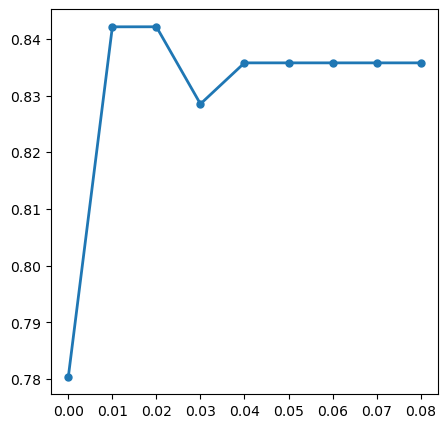

In [6]:
r_state=52
avg_scores = []
parameter_values = np.arange(0,0.09, 0.01)
for mid in parameter_values:
    estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state = r_state, min_impurity_decrease = mid)
    scores = cross_val_score(estimator, x_train, y_train, scoring='accuracy', cv = 10)
    avg_scores.append(np.mean(scores))
#print(avg_scores)

plt.figure(figsize=(5,5))
plt.plot(parameter_values, avg_scores, '-o', linewidth=2, markersize=5)
print("The top accuracy forecast with cross validation is {0:.1f}%".format(avg_scores[np.argmax(avg_scores)]*100))
print("Obtained with min_impurity_decrease = {0:.1f}".format(parameter_values[np.argmax(avg_scores)]))

In [7]:
estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state = r_state,
                                        min_impurity_decrease = 0.02)

In [8]:
estimator.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.02,
                       random_state=52)

In [9]:
estimator.score(x_test,y_test)

0.842391304347826

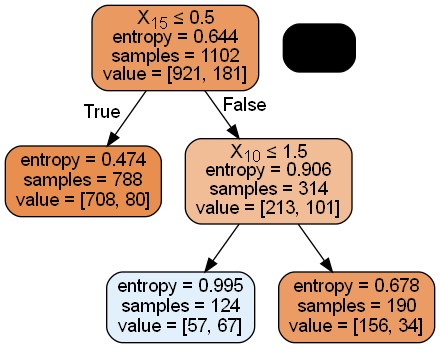

In [10]:
estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state = r_state, min_impurity_decrease = 0.02)
estimator.fit(x_train, y_train)
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [11]:
y_predicted = estimator.predict(x_train)
accuracy_full = np.mean( y_train== y_predicted) * 100
print("The accuracy on full training set is {0:.1f}%".format(accuracy_full))

The accuracy on full training set is 84.5%


In [12]:
model=estimator
pred=model.predict(x_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=model.classes_,
                     columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))
print(model.score(x_test,y_test))

print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

True         0   1
Predicted         
0          295  41
1           17  15
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       312
           1       0.47      0.27      0.34        56

    accuracy                           0.84       368
   macro avg       0.67      0.61      0.63       368
weighted avg       0.82      0.84      0.82       368

0.842391304347826
Duration: --- 0.3522603432337443 Minutes ---


ROC AUC: 0.61


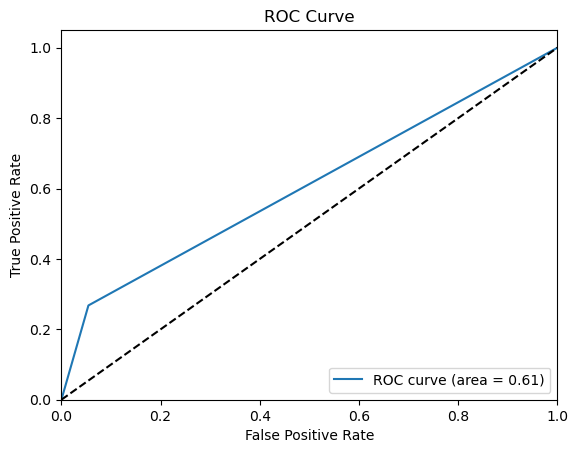

In [13]:
fpr, tpr, _ = roc_curve(y_test, pred)
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [14]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test,pred)

0.25888888888888884

### Lets try Random Forest

In [15]:
model= RandomForestClassifier(max_depth=10,n_estimators=100,oob_score=True,min_samples_split=5,random_state=r_state,
                             min_samples_leaf=2,criterion='gini',max_features=20)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, max_features=20, min_samples_leaf=2,
                       min_samples_split=5, oob_score=True, random_state=52)

In [16]:
model.score(x_test,y_test)

0.8722826086956522

In [17]:
pred=model.predict(x_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=model.classes_,
                     columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))
print(model.score(x_test,y_test))

print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

True         0   1
Predicted         
0          311  46
1            1  10
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       312
           1       0.91      0.18      0.30        56

    accuracy                           0.87       368
   macro avg       0.89      0.59      0.61       368
weighted avg       0.88      0.87      0.83       368

0.8722826086956522
Duration: --- 0.5057818174362183 Minutes ---


ROC AUC: 0.59


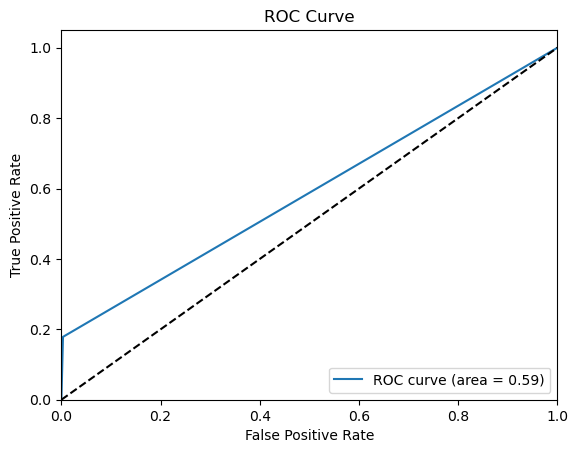

In [18]:
fpr, tpr, _ = roc_curve(y_test, pred)
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [19]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test,pred)

0.26161202185792354

#### Since our data set is imbalanced lets try balancing it

In [20]:
y_train.value_counts()

0    921
1    181
Name: Attrition, dtype: int64

In [21]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=r_state, k_neighbors=9)
x_resampled, y_resampled = sm.fit_resample(x_train, y_train)


In [22]:
x_train_smote = pd.DataFrame(x_resampled, columns=x_train.columns)
y_train_smote = pd.DataFrame(y_resampled, columns=['Attrition'])

In [23]:
y_train_smote['Attrition'].value_counts()

0    921
1    921
Name: Attrition, dtype: int64

Great so now our data is balanced

The top accuracy forecast with cross validation is 83.2%
Obtained with min_impurity_decrease = 0.0
The accuracy on full training set is 100.0%
True         0   1
Predicted         
0          261  37
1           51  19
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       312
           1       0.27      0.34      0.30        56

    accuracy                           0.76       368
   macro avg       0.57      0.59      0.58       368
weighted avg       0.78      0.76      0.77       368

0.7608695652173914
Duration: --- 0.6504258473714193 Minutes ---
ROC AUC: 0.59


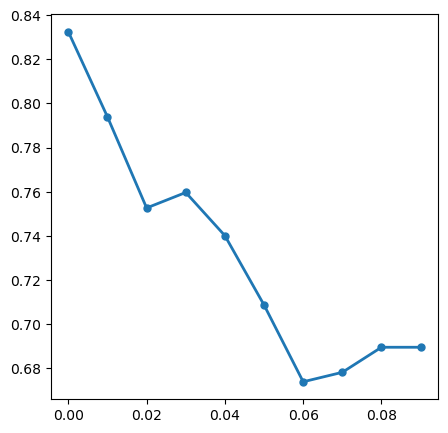

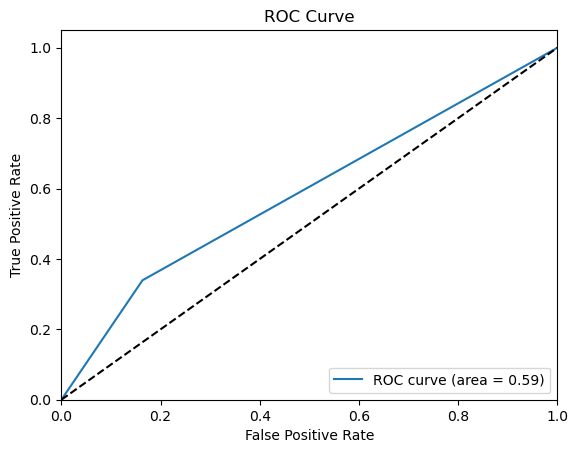

Kappa score is :0.15946843853820603


In [24]:
avg_scores = []
parameter_values = np.arange(0,0.1, 0.01)
for mid in parameter_values:
    estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state = r_state, min_impurity_decrease = mid)
    scores = cross_val_score(estimator, x_train_smote, y_train_smote, scoring='accuracy', cv = 10)
    avg_scores.append(np.mean(scores))
#print(avg_scores)

plt.figure(figsize=(5,5))
plt.plot(parameter_values, avg_scores, '-o', linewidth=2, markersize=5)
print("The top accuracy forecast with cross validation is {0:.1f}%".format(avg_scores[np.argmax(avg_scores)]*100))
print("Obtained with min_impurity_decrease = {0:.1f}".format(parameter_values[np.argmax(avg_scores)]))

estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state = r_state,
                                        min_impurity_decrease = 0.0)
estimator.fit(x_train_smote,y_train_smote)
y_predicted = estimator.predict(x_train_smote)
accuracy_full = np.mean(y_train_smote['Attrition'] == y_predicted) * 100
print("The accuracy on full training set is {0:.1f}%".format(accuracy_full))


model=estimator
pred=model.predict(x_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=model.classes_,
                     columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))
print(model.score(x_test,y_test))

print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

fpr, tpr, _ = roc_curve(y_test, pred)
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import cohen_kappa_score
print("Kappa score is :"+str(cohen_kappa_score(y_test,pred)))

#### Random Forest on Smote Data

In [25]:
model= RandomForestClassifier(max_depth=10,n_estimators=100,oob_score=True,min_samples_split=5,random_state=r_state,
                             min_samples_leaf=2,criterion='gini',max_features=20)
model.fit(x_train_smote,y_train_smote)

RandomForestClassifier(max_depth=10, max_features=20, min_samples_leaf=2,
                       min_samples_split=5, oob_score=True, random_state=52)

In [26]:
model.score(x_test,y_test)

0.8505434782608695

In [27]:
pred=model.predict(x_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=model.classes_,
                     columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))
print(model.score(x_test,y_test))

print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

True         0   1
Predicted         
0          295  38
1           17  18
              precision    recall  f1-score   support

           0       0.89      0.95      0.91       312
           1       0.51      0.32      0.40        56

    accuracy                           0.85       368
   macro avg       0.70      0.63      0.66       368
weighted avg       0.83      0.85      0.84       368

0.8505434782608695
Duration: --- 0.7767390290896098 Minutes ---


ROC AUC: 0.63


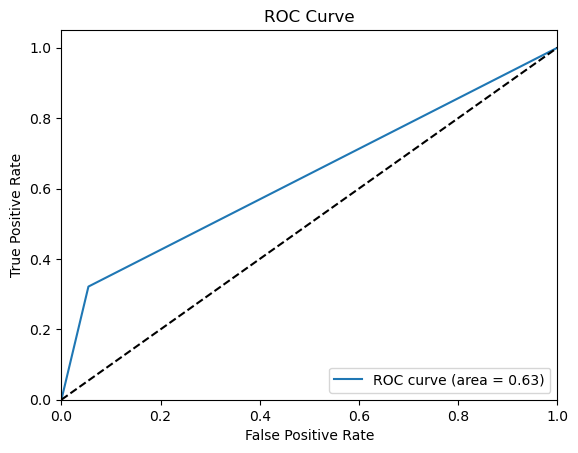

In [28]:
fpr, tpr, _ = roc_curve(y_test, pred)
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [29]:
from sklearn.metrics import cohen_kappa_score
print("Kappa score is :"+str(cohen_kappa_score(y_test,pred)))

Kappa score is :0.31547619047619047
